In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
 

le prétraitement

read ficher csv

In [301]:
df =pd.read_csv("train_Insurance.csv")
df

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


Afficher le nombre total d’observations aussi les 5 premières lignes du dataframe

In [302]:
print(len(df))
df.head()

5012


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


afficher les types du colonnes

In [303]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H13501,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


afficher les valeur null pour chaque attribut et en total aussi afficher si il y a des valeurs dupliquer

In [304]:
print("le nombre total des valeurs null est", df.isnull().sum().sum())
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())
print("\n le nombre des valeurs dupliquer est= ",df.duplicated().sum())

le nombre total des valeurs null est 154

 le nombre des valeurs null pour chaque attribut=  Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

 le nombre des valeurs dupliquer est=  0


on diviser les attribut de type numerique et de type object dans deux listes

In [305]:
 l_num=list(df.select_dtypes(include="number"))
 l_discret=list(df.select_dtypes(include="object"))
 print("colonnes avec valeur numerique",l_num)
 print("colonnes avec valeur catégorielles",l_discret)


colonnes avec valeur numerique ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension']
colonnes avec valeur catégorielles ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows', 'Geo_Code', 'Claim']


matrice de correlation

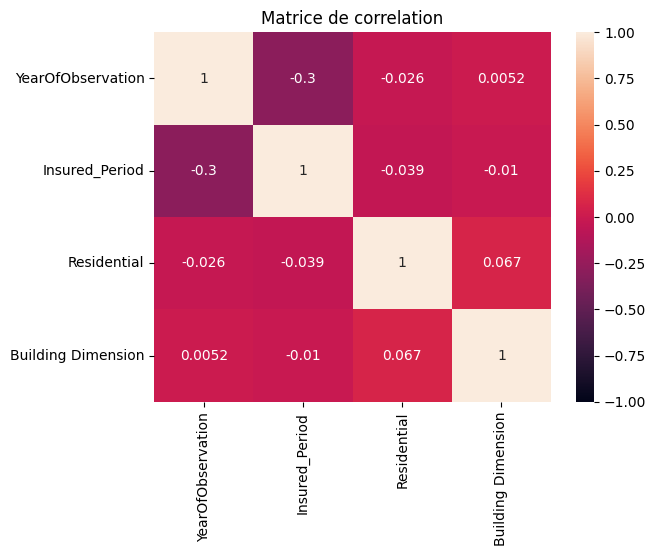

In [306]:
 df_corr=df.corr(numeric_only=True)
 sns.heatmap(df_corr,annot=True,vmin=-1,vmax=1)
 plt.title('Matrice de correlation')
 plt.show()

Représenter les boxplots de l’attribut "Building Dimension" de dataframe , en fonction des valeurs de 
l’attribut numérique qui présente la corrélation la plus élevée "Residential"

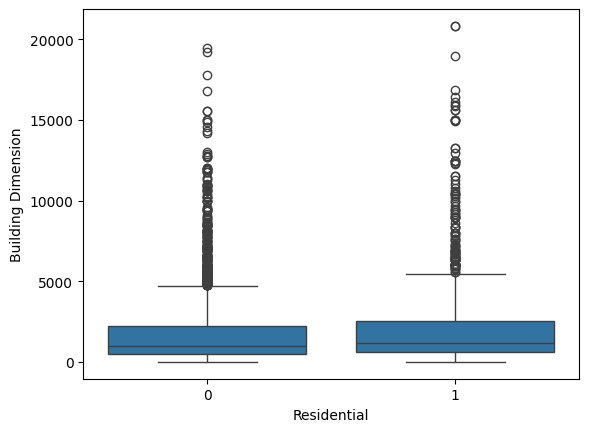

In [307]:
sns.boxplot(y='Building Dimension',x='Residential',data=df)
plt.show()

remplir les valeurs manquantesde l’attribut "Building Dimension" avec les valeurs appropriées

In [308]:
a=df[df["Residential"]==0]['Building Dimension'].median()
b=df[df["Residential"]==1]['Building Dimension'].median()

df['Building Dimension'].fillna(df['Residential'].apply(lambda x: a if x == 0 else b), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14432\368091205.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Building Dimension'].fillna(df['Residential'].apply(lambda x: a if x == 0 else b), inplace=True)


In [309]:
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())


 le nombre des valeurs null pour chaque attribut=  Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64


the SimpleImputer is used to handle missing values (NaN) in the Garden and Geo_Code columns by replacing them with the most frequent value (mode) from each respective column
Replacing missing values with the mode is straightforward, computationally efficient, and works well for categorical features.

In [310]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['Garden']]=imputer.fit_transform(df.loc[:,['Garden']])
df[['Geo_Code']]=imputer.fit_transform(df.loc[:,['Geo_Code']])  

In [311]:
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())


 le nombre des valeurs null pour chaque attribut=  Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64


affiche l’histogramme de la distribution des attributs catégoriel 

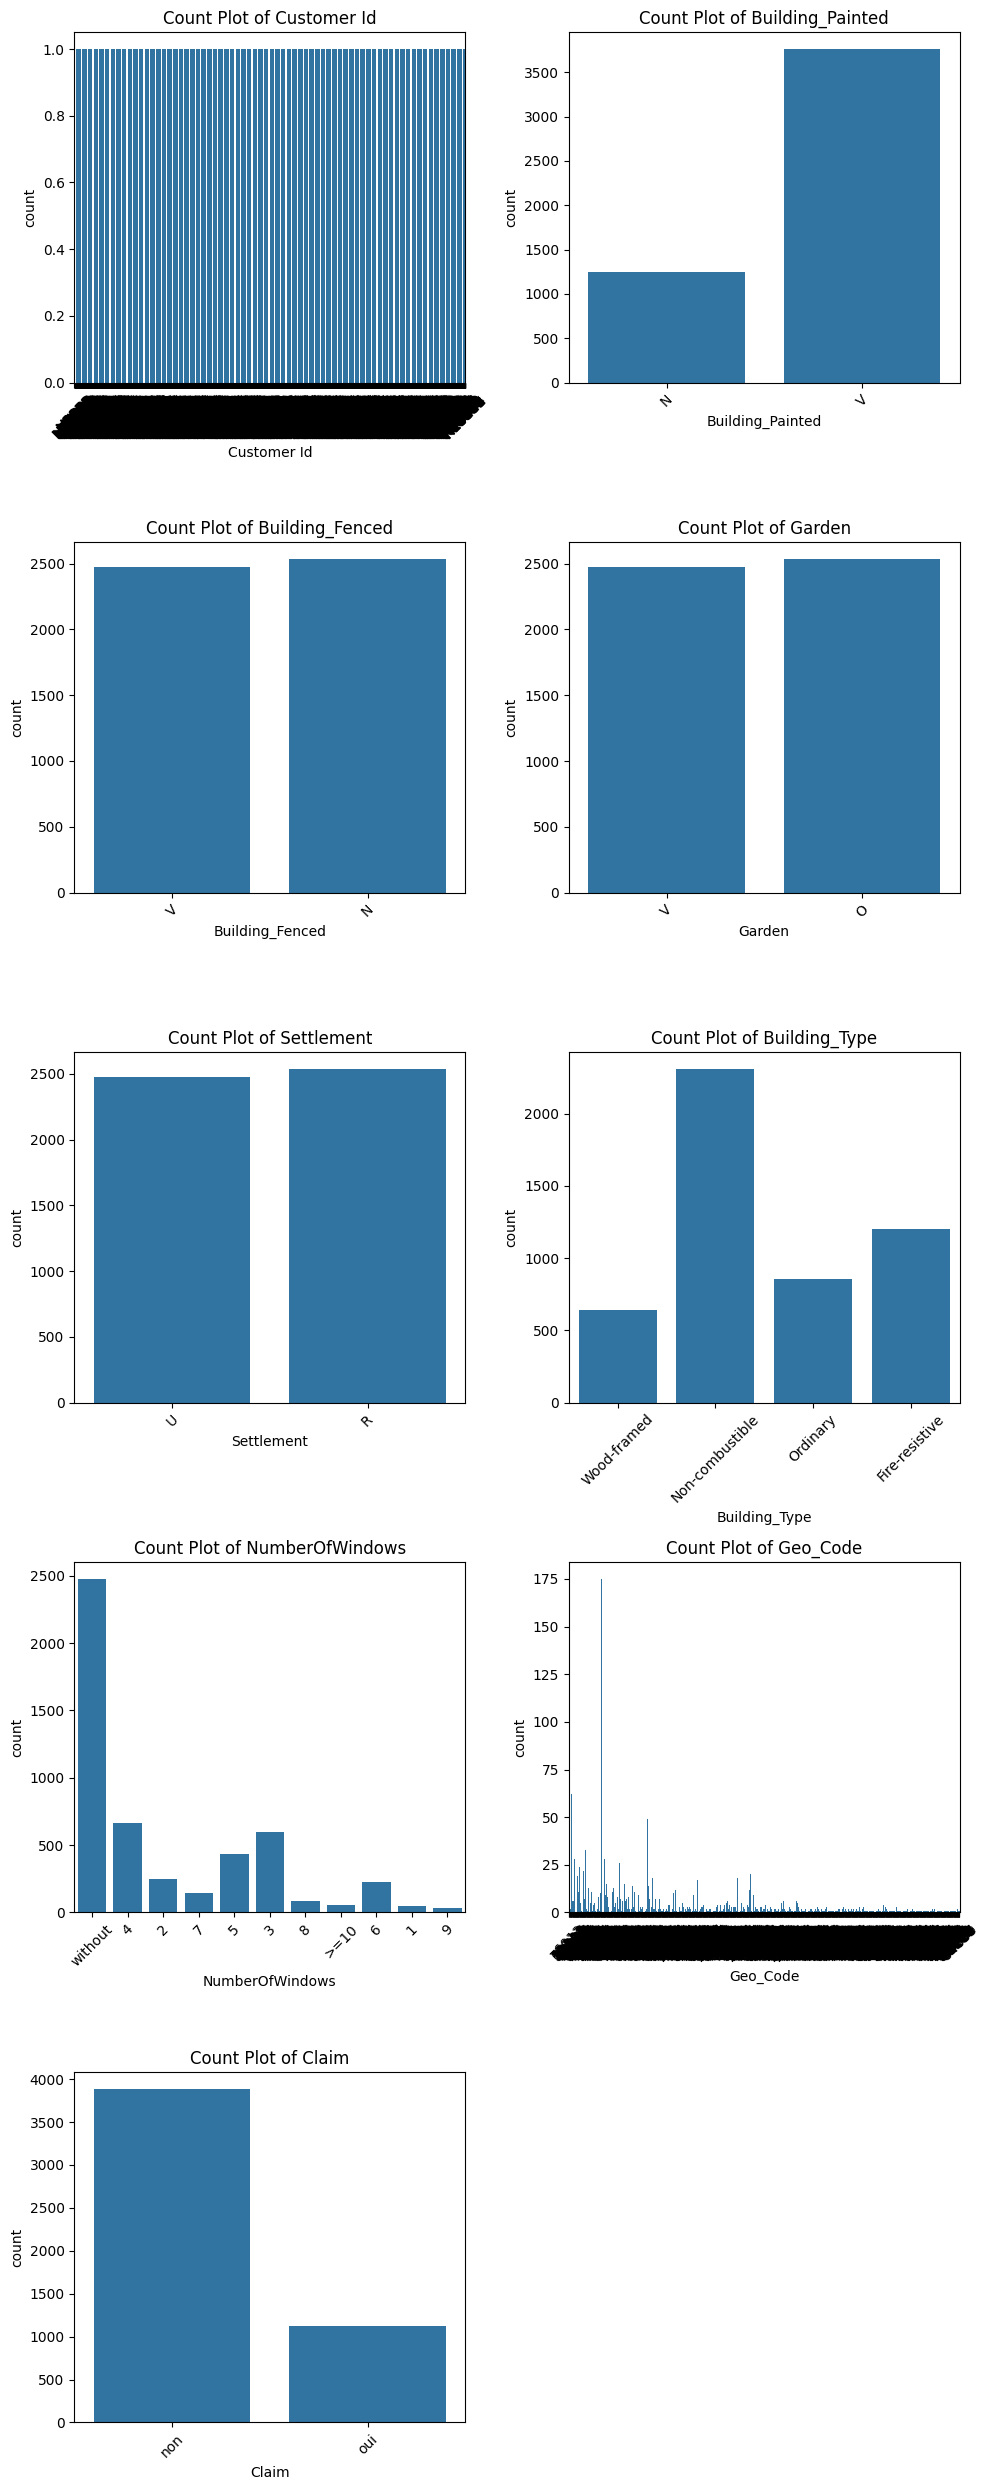

In [312]:
num_plots = len(l_discret)
cols = 2  
rows = (num_plots + cols - 1) // cols
plt.figure(figsize=(10, 5 * rows))

for i in range(num_plots):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=l_discret[i], data=df)
    plt.title(f'Count Plot of {l_discret[i]}') 
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Geo_Code has too many unique values compared to the dataset size (e.g., almost as many unique codes as rows), it might act more like an identifier than a feature, making it less informative for prediction.
Cardinality: Geo_Code has 1115 unique values out of 5012 rows.
High cardinality (many unique values) relative to the dataset size suggests that it may not be very informative on its own.
If each Geo_Code has only a few occurrences, it may act more like an identifier than a meaningful feature.

1115
5012
Geo_Code
10033    0.0
10081    0.0
10297    0.0
10333    0.0
10343    0.0
Name: Claim, dtype: float64
Geo_Code
6088     175
33063     97
6083      83
31555     62
13206     59
Name: count, dtype: int64
count    1115.000000
mean        0.189957
std         0.303223
min         0.000000
25%         0.000000
50%         0.000000
75%         0.333333
max         1.000000
Name: Claim, dtype: float64


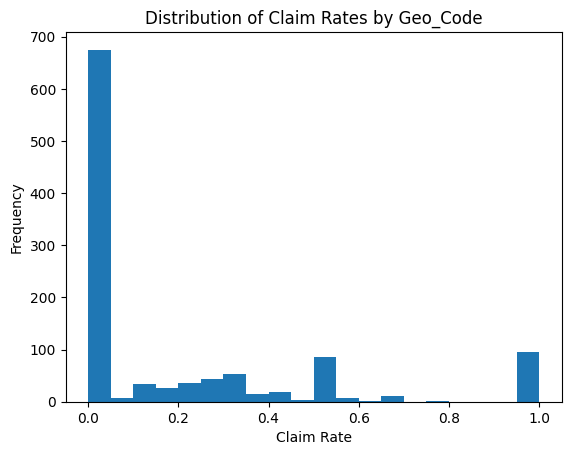

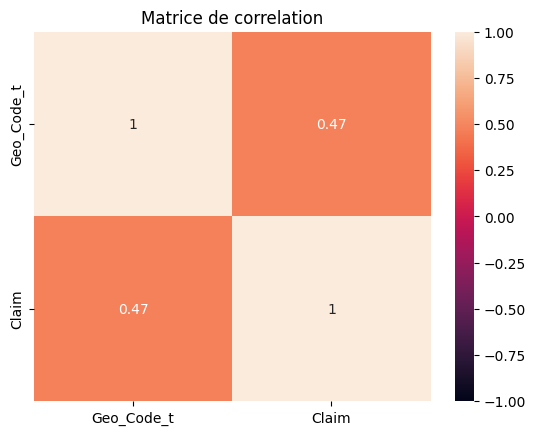

            Geo_Code_t     Claim
Geo_Code_t    1.000000  0.473886
Claim         0.473886  1.000000


In [313]:
print(df['Geo_Code'].nunique())
print(len(df))

enc = LabelEncoder()
df1=df
df1["Claim"]=enc.fit_transform(df.loc[:,"Claim"])
claim_column1 = df.pop('Claim')  
df1['Claim'] = claim_column1   
df1
claim_rate_by_geo = df1.groupby('Geo_Code')['Claim'].mean()
print(claim_rate_by_geo.head())
claim_rate_by_geo.describe()
geo_code_counts = df1['Geo_Code'].value_counts()
print(geo_code_counts.head())
print(claim_rate_by_geo.describe())
claim_rate_by_geo.plot(kind='hist', bins=20, title='Distribution of Claim Rates by Geo_Code')
plt.xlabel('Claim Rate')
plt.ylabel('Frequency')
plt.show()
df1['Geo_Code_t'] = df1['Geo_Code'].map(claim_rate_by_geo)

correlation = df1[['Geo_Code_t', 'Claim']].corr()
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1)
plt.title('Matrice de correlation')
plt.show()
print(correlation)



The moderate correlation (0.47) suggests that Geo_Code_Target does have predictive value for the Claim variable.
While it is not a very strong correlation, it is significant enough to warrant keeping Geo_Code_Target as a feature in the model.

Replace Geo_Code with the mean claim rate for each geographic region.
Useful for capturing the historical relationship between Geo_Code and the target variable Claim.

In [314]:
#df.drop(labels=["Customer Id","Geo_Code"], axis=1, inplace=True)
#df.drop(labels=["Customer Id","Geo_Code_Target"], axis=1, inplace=True)
print(df.columns)
claim_rate_by_geo = df.groupby('Geo_Code')['Claim'].mean()
df['Geo_Code_t'] = df['Geo_Code'].map(claim_rate_by_geo)
df.drop(labels=["Customer Id","Geo_Code"], axis=1, inplace=True)

#df.drop(labels=["Customer Id","Geo_Code_t"], axis=1, inplace=True)
###df.drop(labels=["Customer Id","Geo_Code","Geo_Code_t"], axis=1, inplace=True)

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code',
       'Claim', 'Geo_Code_t'],
      dtype='object')


In [315]:
df.isnull().sum()
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim,Geo_Code_t
0,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,0,0.312500
1,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,0,0.000000
2,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,1,1.000000
3,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,1,0.360000
4,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,1,0.134021
5008,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,0,0.157895
5009,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,0,0.000000
5010,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,0,0.000000


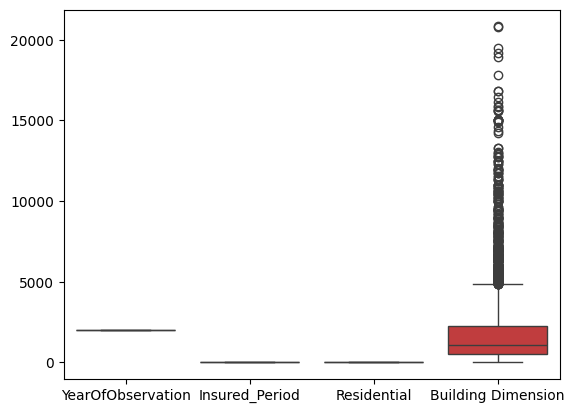

In [316]:
sns.boxplot(data=df[l_num])
plt.show()

In [317]:
def adjust_outliers(dff, col):
 Q1,Q3=np.percentile(dff[col], [25,75])
 IQR=Q3-Q1
 upper_limit=Q3+1.5*IQR
 lower_limit=Q1-1.5*IQR
 dff[col]=np.where(dff[col]>upper_limit, upper_limit, np.where(dff[col]<lower_limit, lower_limit,dff[col]))

In [318]:
df['NumberOfWindows'] = df['NumberOfWindows'].replace('without', 0)


In [319]:
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())


 le nombre des valeurs null pour chaque attribut=  YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Claim                 0
Geo_Code_t            0
dtype: int64


In [320]:

adjust_outliers(df, "Building Dimension")
adjust_outliers(df, "YearOfObservation")
adjust_outliers(df, "Insured_Period")
adjust_outliers(df, "Residential")


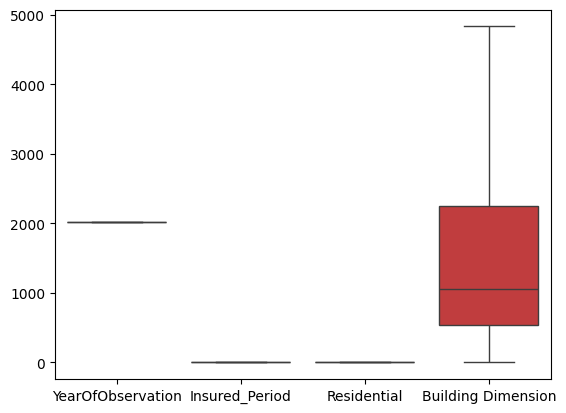

In [321]:
sns.boxplot(data=df[l_num])
plt.show()

In [322]:
#enc = OrdinalEncoder()
#df[['Building_Painted',"Building_Fenced","Garden","Settlement"]]=enc.fit_transform(df.loc[:,['Building_Painted',"Building_Fenced","Garden","Settlement"]])
enc = LabelEncoder()
df["Building_Painted"]=enc.fit_transform(df.loc[:,"Building_Painted"])
df["Building_Fenced"]=enc.fit_transform(df.loc[:,"Building_Fenced"])
df["Garden"]=enc.fit_transform(df.loc[:,"Garden"])
df["Settlement"]=enc.fit_transform(df.loc[:,"Settlement"])

In [323]:
df.head()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim,Geo_Code_t
0,2012.0,1.0,1.0,0,1,1,1,1240.0,Wood-framed,0,0,0.3125
1,2012.0,1.0,0.0,0,1,1,1,900.0,Non-combustible,0,0,0.0000
2,2013.0,1.0,1.0,1,0,0,0,4830.0,Non-combustible,4,1,1.0000
3,2016.0,0.5,0.0,0,1,1,1,600.0,Wood-framed,0,1,0.3600
4,2012.0,1.0,0.0,0,1,1,1,900.0,Non-combustible,0,0,0.0000


Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Claim',
       'Geo_Code_t'],
      dtype='object')


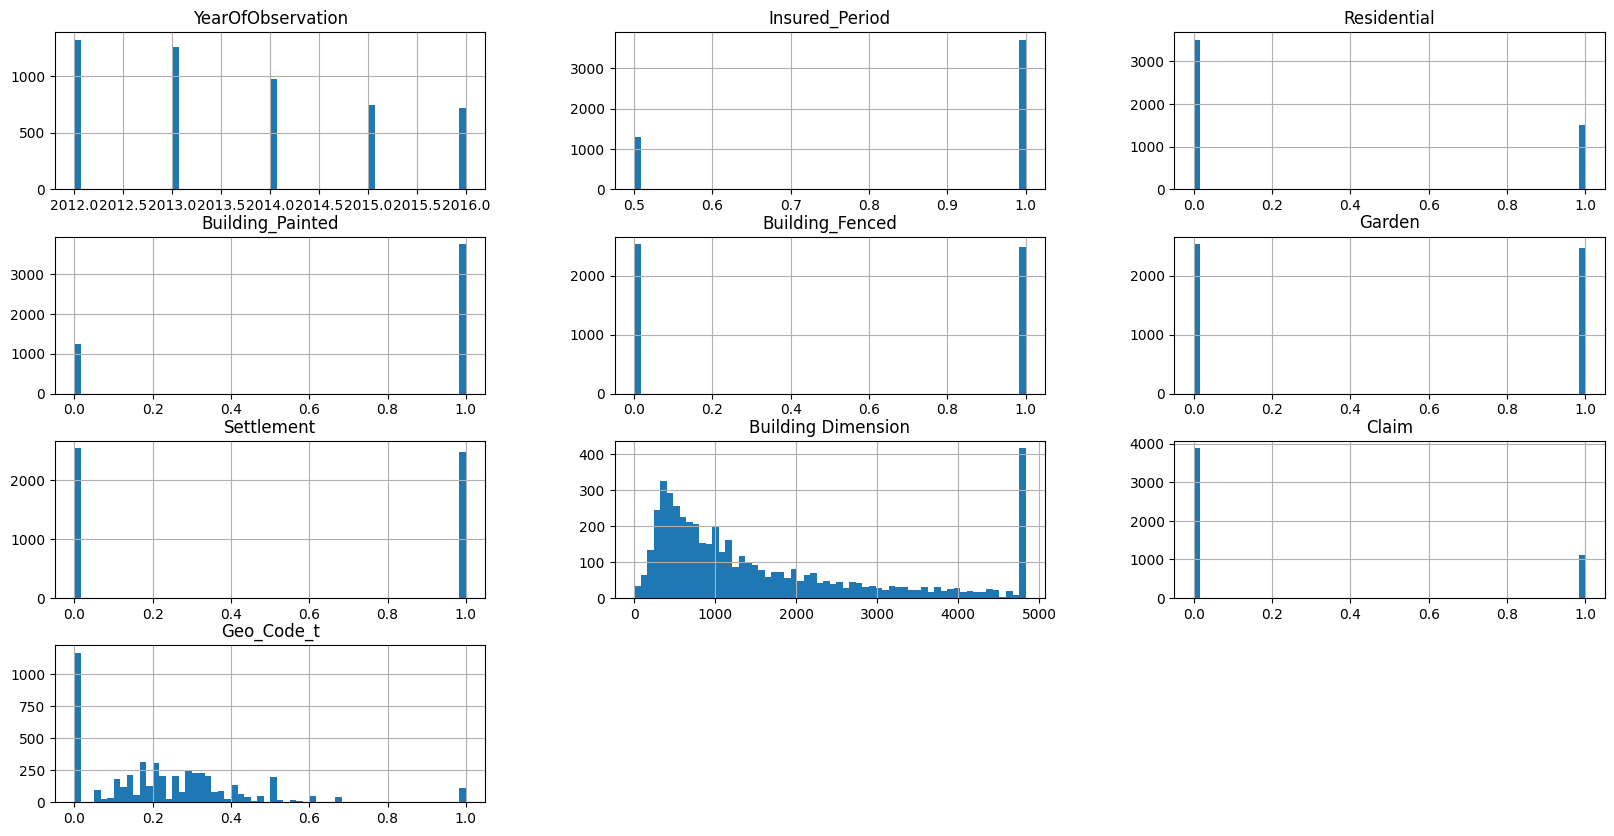

In [324]:
df.hist(bins=60,figsize=(20,10))
print(df.columns)


In [325]:
enc = OneHotEncoder(sparse_output=False, categories=[["Fire-resistive", "Non-combustible","Ordinary","Wood-framed"]])
df[["Fire-resistive","Non-combustible","Ordinary","Wood-framed"]]=enc.fit_transform(df.loc[:,["Building_Type"]])
df.drop(labels=["Building_Type"], axis=1, inplace=True)
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Claim,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed
0,2012.0,1.0,1.0,0,1,1,1,1240.0,0,0,0.312500,0.0,0.0,0.0,1.0
1,2012.0,1.0,0.0,0,1,1,1,900.0,0,0,0.000000,0.0,1.0,0.0,0.0
2,2013.0,1.0,1.0,1,0,0,0,4830.0,4,1,1.000000,0.0,1.0,0.0,0.0
3,2016.0,0.5,0.0,0,1,1,1,600.0,0,1,0.360000,0.0,0.0,0.0,1.0
4,2012.0,1.0,0.0,0,1,1,1,900.0,0,0,0.000000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013.0,1.0,0.0,0,1,1,1,550.0,0,1,0.134021,0.0,0.0,1.0,0.0
5008,2012.0,0.5,0.0,1,0,0,0,1000.0,4,0,0.157895,1.0,0.0,0.0,0.0
5009,2015.0,1.0,1.0,1,0,0,0,480.0,3,0,0.000000,0.0,0.0,1.0,0.0
5010,2012.0,0.5,0.0,1,0,0,0,536.0,4,0,0.000000,1.0,0.0,0.0,0.0


Using one-hot encoding here ensures the model treats each building type equally, without implying any ranking.

For encoding the Building_Type categorical feature, which has four distinct, non-ordinal categories ('Fire-resistive', 'Non-combustible', 'Ordinary', and 'Wood-framed'), One-Hot Encoding is generally the best choice. Here’s why and how to do it:

Why Use One-Hot Encoding
 Non-Ordinal Nature: The categories here don’t have an inherent order. One-hot encoding avoids implying a false order or ranking among these types,   which might occur if you use ordinal encoding.
 Model Compatibility: One-hot encoding works well with most machine learning algorithms, particularly those that do not assume any ordering of categorical variables, such as linear regression, k-nearest neighbors, and neural networks.

In [326]:
 l_num2=list(df.select_dtypes(include="number"))

In [327]:

#s=VarianceThreshold(threshold=0.1)
#X_selected= s.fit_transform(df[l_num2])
#ind_col= s.get_support(indices=True) 
#df=pd.DataFrame(X_selected,columns=list(df.iloc[:,ind_col]))

In [328]:
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Claim,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed
0,2012.0,1.0,1.0,0,1,1,1,1240.0,0,0,0.312500,0.0,0.0,0.0,1.0
1,2012.0,1.0,0.0,0,1,1,1,900.0,0,0,0.000000,0.0,1.0,0.0,0.0
2,2013.0,1.0,1.0,1,0,0,0,4830.0,4,1,1.000000,0.0,1.0,0.0,0.0
3,2016.0,0.5,0.0,0,1,1,1,600.0,0,1,0.360000,0.0,0.0,0.0,1.0
4,2012.0,1.0,0.0,0,1,1,1,900.0,0,0,0.000000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013.0,1.0,0.0,0,1,1,1,550.0,0,1,0.134021,0.0,0.0,1.0,0.0
5008,2012.0,0.5,0.0,1,0,0,0,1000.0,4,0,0.157895,1.0,0.0,0.0,0.0
5009,2015.0,1.0,1.0,1,0,0,0,480.0,3,0,0.000000,0.0,0.0,1.0,0.0
5010,2012.0,0.5,0.0,1,0,0,0,536.0,4,0,0.000000,1.0,0.0,0.0,0.0


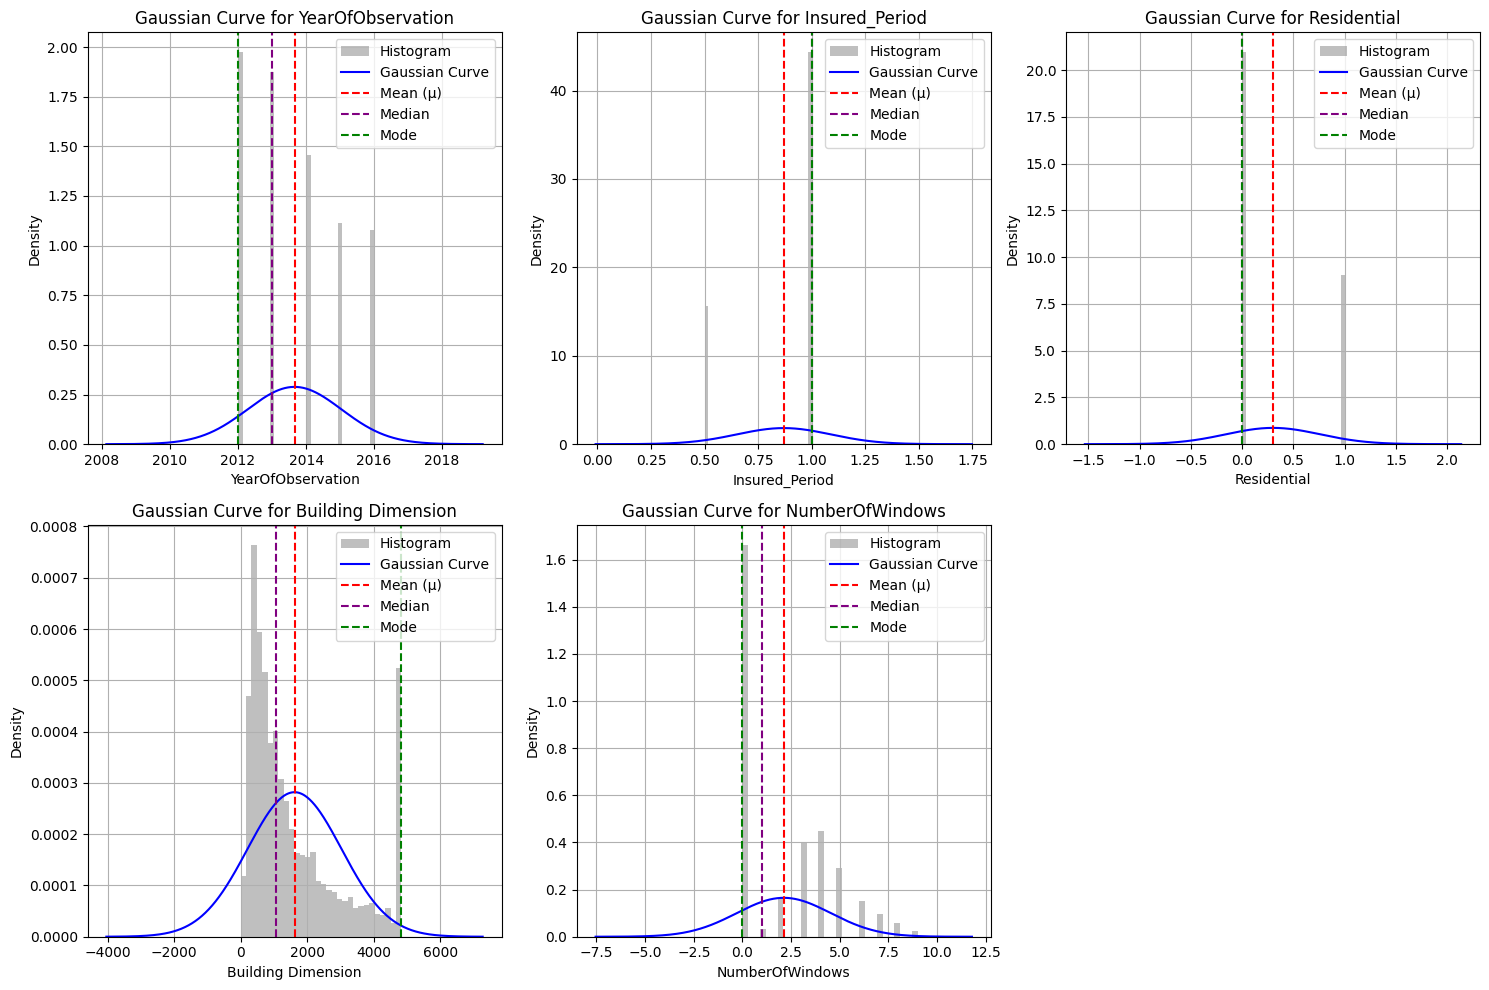

In [329]:
features = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'NumberOfWindows']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create subplots
    
    # Convert the feature to numeric, setting errors='coerce' will turn non-numeric values into NaN
    df[feature] = pd.to_numeric(df[feature], errors='coerce')
    
    # Drop NaN values that resulted from conversion
    feature_data = df[feature].dropna()
    
    # Calculate mean, median, and mode
    mu = feature_data.mean()
    median = feature_data.median()
    mode = feature_data.mode()[0]  # Get the first mode value
    
    # Calculate standard deviation
    sigma = feature_data.std()

    # Generate values for the Gaussian curve
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    # Plot histogram and Gaussian curve
    plt.hist(feature_data, bins=30, density=True, alpha=0.5, color='gray', label='Histogram')
    plt.plot(x, y, label='Gaussian Curve', color='blue')
    
    # Plotting mean, median, and mode
    plt.axvline(mu, color='red', linestyle='--', label='Mean (μ)')
    plt.axvline(median, color='purple', linestyle='--', label='Median')
    plt.axvline(mode, color='green', linestyle='--', label='Mode')

    plt.title(f'Gaussian Curve for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid()

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [330]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Claim,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed
0,2012.0,1.0,1.0,0,1,1,1,1240.0,0.0,0,0.3125,0.0,0.0,0.0,1.0
1,2012.0,1.0,0.0,0,1,1,1,900.0,0.0,0,0.0000,0.0,1.0,0.0,0.0
2,2013.0,1.0,1.0,1,0,0,0,4830.0,4.0,1,1.0000,0.0,1.0,0.0,0.0
3,2016.0,0.5,0.0,0,1,1,1,600.0,0.0,1,0.3600,0.0,0.0,0.0,1.0
4,2012.0,1.0,0.0,0,1,1,1,900.0,0.0,0,0.0000,0.0,1.0,0.0,0.0


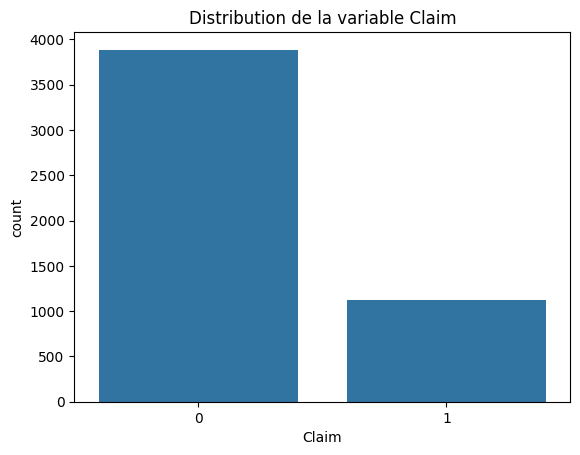

In [331]:
sns.countplot(x='Claim', data=df)
plt.title('Distribution de la variable Claim')
plt.show()


For the Claim variable, which is a binary categorical variable with values like "oui" (yes) and "non" (no), you can use Label Encoding or Binary Encoding. 
Since Claim has only two possible values, label encoding is straightforward and will map the categories to numeric values (e.g., "oui" to 1 and "non" to 0). Most machine learning models handle binary features well, so label encoding is usually effective here.

oui --> 1
non --> 0

In [332]:
enc = LabelEncoder()
df["Claim"]=enc.fit_transform(df.loc[:,"Claim"])
claim_column = df.pop('Claim')  
df['Claim'] = claim_column   
df

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
0,2012.0,1.0,1.0,0,1,1,1,1240.0,0.0,0.312500,0.0,0.0,0.0,1.0,0
1,2012.0,1.0,0.0,0,1,1,1,900.0,0.0,0.000000,0.0,1.0,0.0,0.0,0
2,2013.0,1.0,1.0,1,0,0,0,4830.0,4.0,1.000000,0.0,1.0,0.0,0.0,1
3,2016.0,0.5,0.0,0,1,1,1,600.0,0.0,0.360000,0.0,0.0,0.0,1.0,1
4,2012.0,1.0,0.0,0,1,1,1,900.0,0.0,0.000000,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013.0,1.0,0.0,0,1,1,1,550.0,0.0,0.134021,0.0,0.0,1.0,0.0,1
5008,2012.0,0.5,0.0,1,0,0,0,1000.0,4.0,0.157895,1.0,0.0,0.0,0.0,0
5009,2015.0,1.0,1.0,1,0,0,0,480.0,3.0,0.000000,0.0,0.0,1.0,0.0,0
5010,2012.0,0.5,0.0,1,0,0,0,536.0,4.0,0.000000,1.0,0.0,0.0,0.0,0


In [333]:
 df
 #print(l_num2)
 #min_max_scaler=MinMaxScaler()
 #arr=min_max_scaler.fit_transform(df[['Building Dimension','Insured_Period','NumberOfWindows']])
 #pd.DataFrame(arr,columns=['X1','X2','x3'])

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,NumberOfWindows,Geo_Code_t,Fire-resistive,Non-combustible,Ordinary,Wood-framed,Claim
0,2012.0,1.0,1.0,0,1,1,1,1240.0,0.0,0.312500,0.0,0.0,0.0,1.0,0
1,2012.0,1.0,0.0,0,1,1,1,900.0,0.0,0.000000,0.0,1.0,0.0,0.0,0
2,2013.0,1.0,1.0,1,0,0,0,4830.0,4.0,1.000000,0.0,1.0,0.0,0.0,1
3,2016.0,0.5,0.0,0,1,1,1,600.0,0.0,0.360000,0.0,0.0,0.0,1.0,1
4,2012.0,1.0,0.0,0,1,1,1,900.0,0.0,0.000000,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,2013.0,1.0,0.0,0,1,1,1,550.0,0.0,0.134021,0.0,0.0,1.0,0.0,1
5008,2012.0,0.5,0.0,1,0,0,0,1000.0,4.0,0.157895,1.0,0.0,0.0,0.0,0
5009,2015.0,1.0,1.0,1,0,0,0,480.0,3.0,0.000000,0.0,0.0,1.0,0.0,0
5010,2012.0,0.5,0.0,1,0,0,0,536.0,4.0,0.000000,1.0,0.0,0.0,0.0,0


In [334]:
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())


 le nombre des valeurs null pour chaque attribut=  YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
NumberOfWindows       53
Geo_Code_t             0
Fire-resistive         0
Non-combustible        0
Ordinary               0
Wood-framed            0
Claim                  0
dtype: int64


In [335]:
df['NumberOfWindows'] = df['NumberOfWindows'].fillna(df['NumberOfWindows'].mode()[0])

In [336]:
print("\n le nombre des valeurs null pour chaque attribut= ",df.isnull().sum())


 le nombre des valeurs null pour chaque attribut=  YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
NumberOfWindows       0
Geo_Code_t            0
Fire-resistive        0
Non-combustible       0
Ordinary              0
Wood-framed           0
Claim                 0
dtype: int64


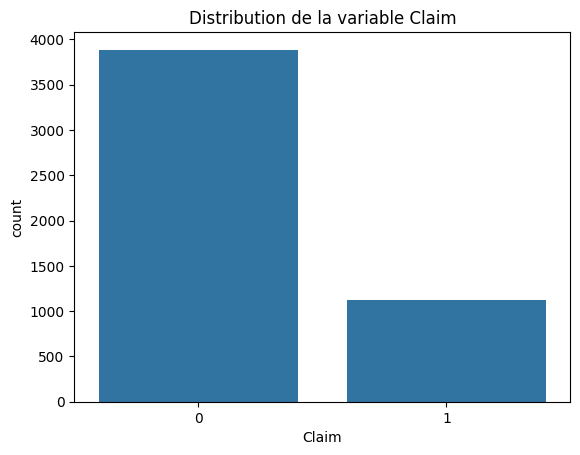

In [337]:
sns.countplot(x='Claim', data=df)
plt.title('Distribution de la variable Claim')
plt.show()


In [338]:
 X = df.iloc[:,:-1].values
 Y = df.iloc[:,-1].values
 

 print("Y=\n", Y)
 print("X=\n", X)

Y=
 [0 0 1 ... 0 0 0]
X=
 [[2.012e+03 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.012e+03 1.000e+00 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [2.013e+03 1.000e+00 1.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [2.015e+03 1.000e+00 1.000e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.012e+03 5.000e-01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.013e+03 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]]


In [339]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=1)

pip install imbalanced-learn


In [340]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

In [341]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Apply ADASYN to your training data
X_resampled, y_resampled = adasyn.fit_resample(X_train, Y_train)

Y_train_series = pd.Series(Y_train)
y_resampled_series = pd.Series(y_resampled)

# Check the new distribution of classes
print(f"Original class distribution: \n{Y_train_series.value_counts()}")
print(f"Resampled class distribution: \n{y_resampled_series.value_counts()}")

Original class distribution: 
0    2727
1     781
Name: count, dtype: int64
Resampled class distribution: 
1    2768
0    2727
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14432\1300021034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train,palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_14432\1300021034.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled,palette='Set2')


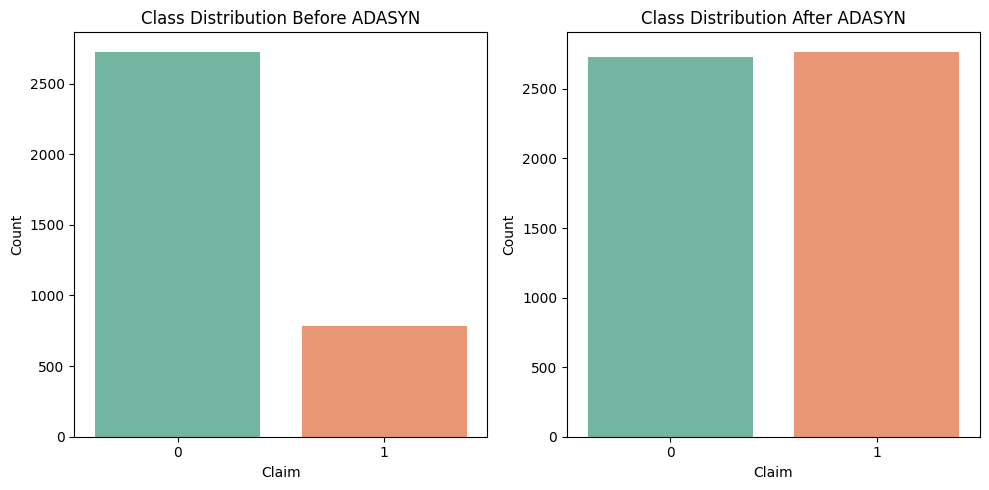

In [342]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) 
sns.countplot(x=Y_train,palette='Set2')
plt.title('Class Distribution Before ADASYN')
plt.xlabel('Claim')
plt.ylabel('Count')


plt.subplot(1, 2, 2) 
sns.countplot(x=y_resampled,palette='Set2')
plt.title('Class Distribution After ADASYN')
plt.xlabel('Claim')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

ML Models

 badelt X_train w Y_train with X_resampled,y_resampled

In [343]:
cls1 = DecisionTreeClassifier()
cls1.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [344]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [345]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_resampled,y_resampled)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [346]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_resampled,y_resampled)

KNeighborsClassifier()

In [347]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(X_resampled,y_resampled)

SVC()

0 --> non
1 --> oui

<Axes: >

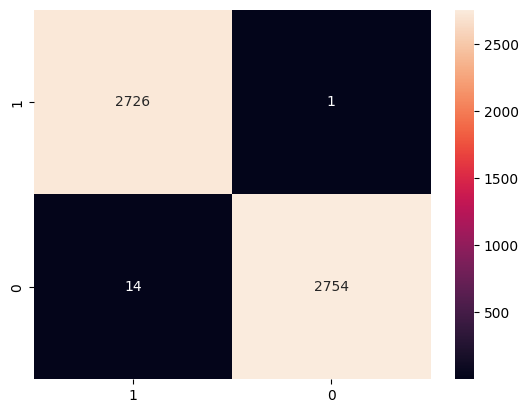

In [348]:
Y_p_train = cls1.predict(X_resampled)
cm=confusion_matrix(y_resampled, Y_p_train)
sns.heatmap(cm, annot=True, fmt="d", 
xticklabels=['1','0'], yticklabels=['1','0'])

[[982 177]
 [188 157]]


<Axes: >

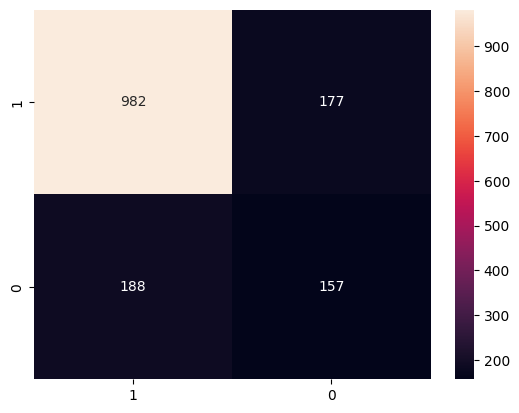

In [349]:
accuracy_score(y_resampled,Y_p_train)
Y_test_p1=cls1.predict(X_test)
print(confusion_matrix(Y_test,Y_test_p1))
cm2=confusion_matrix(Y_test,Y_test_p1)
sns.heatmap(cm2, annot=True, fmt="d", xticklabels=['1','0'], yticklabels=['1','0'])

In [350]:
df["Claim"].value_counts()

Claim
0    3886
1    1126
Name: count, dtype: int64

In [351]:
 cls2 = DecisionTreeClassifier(max_depth=3,max_features="sqrt")

[[3700  186]
 [ 822  304]]
Accuracy: 0.799


<Axes: >

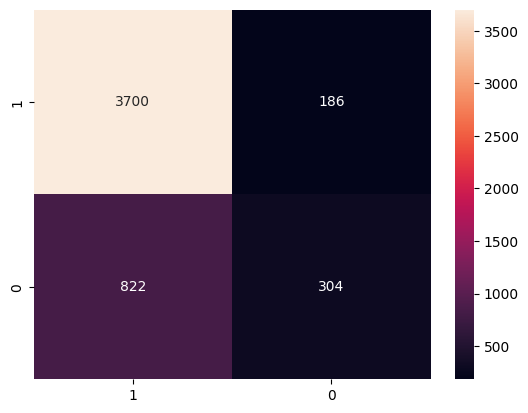

In [352]:
y_pred = cross_val_predict(cls2, X, Y, cv=10)
print(confusion_matrix(Y,y_pred))
print("Accuracy: {:.3f}".format(accuracy_score(Y,y_pred)))
cm3=confusion_matrix(Y,y_pred)
sns.heatmap(cm3, annot=True, fmt="d", xticklabels=['1','0'], yticklabels=['1','0'])

cls1: DecisionTreeClassifier

Accuracy: 0.757313829787234
Precision: 0.754613151629093
Recall: 0.757313829787234
F1 Score: 0.7559211463871888
Confusion Matrix:
 [[982 177]
 [188 157]]

DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1159
           1       0.47      0.46      0.46       345

    accuracy                           0.76      1504
   macro avg       0.65      0.65      0.65      1504
weighted avg       0.75      0.76      0.76      1504



<Axes: >

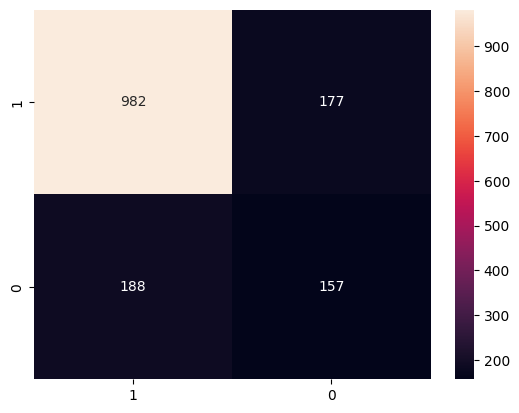

In [353]:
y_pred = cls1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nDecisionTreeClassifier:\n", classification_report(Y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1','0'], yticklabels=['1','0'])

model 1 : RandomForestClassifier

Accuracy: 0.7945478723404256
Precision: 0.7752737621241065
Recall: 0.7945478723404256
F1 Score: 0.7792049513434617
Confusion Matrix:
 [[1061   98]
 [ 211  134]]

RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1159
           1       0.58      0.39      0.46       345

    accuracy                           0.79      1504
   macro avg       0.71      0.65      0.67      1504
weighted avg       0.78      0.79      0.78      1504



<Axes: >

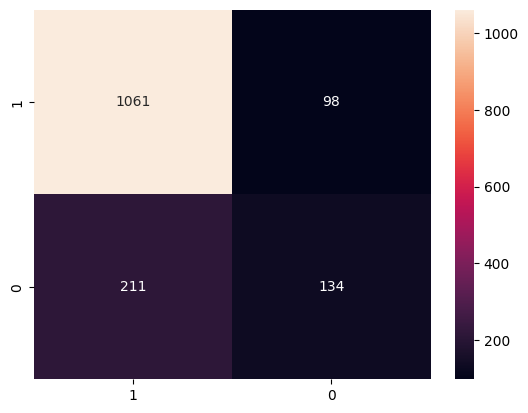

In [354]:
y_pred = model1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nRandomForestClassifier:\n", classification_report(Y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1','0'], yticklabels=['1','0'])

model2 : LogisticRegression

Accuracy: 0.7446808510638298
Precision: 0.8066000893164985
Recall: 0.7446808510638298
F1 Score: 0.7617505753159192
Confusion Matrix:
 [[862 297]
 [ 87 258]]

LogisticRegression:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1159
           1       0.46      0.75      0.57       345

    accuracy                           0.74      1504
   macro avg       0.69      0.75      0.70      1504
weighted avg       0.81      0.74      0.76      1504



<Axes: >

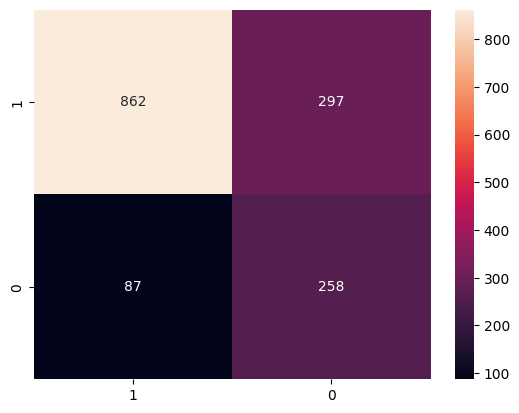

In [355]:
y_pred = model2.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nLogisticRegression:\n", classification_report(Y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1','0'], yticklabels=['1','0'])

model3 : KNeighborsClassifier

Accuracy: 0.6070478723404256
Precision: 0.6999506811150452
Recall: 0.6070478723404256
F1 Score: 0.6363654349529423
Confusion Matrix:
 [[729 430]
 [161 184]]

KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71      1159
           1       0.30      0.53      0.38       345

    accuracy                           0.61      1504
   macro avg       0.56      0.58      0.55      1504
weighted avg       0.70      0.61      0.64      1504



<Axes: >

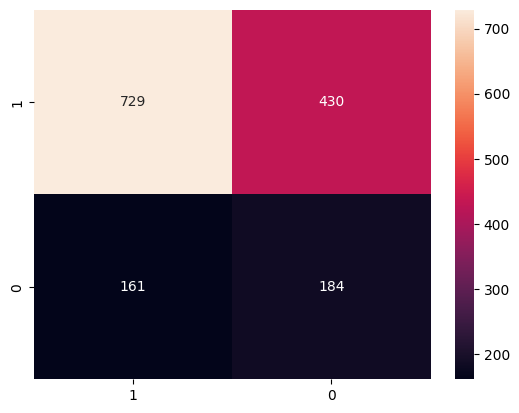

In [356]:
y_pred = model3.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nKNeighborsClassifier:\n", classification_report(Y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1','0'], yticklabels=['1','0'])

model4 : SVC

Accuracy: 0.6815159574468085
Precision: 0.740666405926492
Recall: 0.6815159574468085
F1 Score: 0.7014967992554993
Confusion Matrix:
 [[826 333]
 [146 199]]

SVC:
               precision    recall  f1-score   support

           0       0.85      0.71      0.78      1159
           1       0.37      0.58      0.45       345

    accuracy                           0.68      1504
   macro avg       0.61      0.64      0.61      1504
weighted avg       0.74      0.68      0.70      1504



<Axes: >

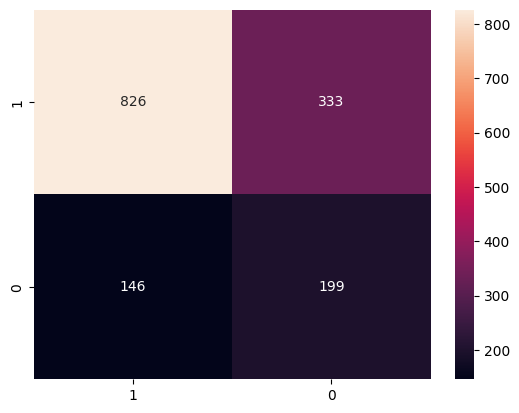

In [357]:
y_pred = model4.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nSVC:\n", classification_report(Y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1','0'], yticklabels=['1','0'])

we choose the model 1 because it has the best results :


In [358]:
import joblib
joblib.dump(cls1, 'cls1.pkl')
joblib.dump(model1, 'model1.pkl')
joblib.dump(model2, 'model2.pkl')
joblib.dump(model3, 'model3.pkl')
joblib.dump(model4, 'model4.pkl')

['model4.pkl']

In [359]:
print(df.dtypes)


YearOfObservation     float64
Insured_Period        float64
Residential           float64
Building_Painted        int32
Building_Fenced         int32
Garden                  int32
Settlement              int32
Building Dimension    float64
NumberOfWindows       float64
Geo_Code_t            float64
Fire-resistive        float64
Non-combustible       float64
Ordinary              float64
Wood-framed           float64
Claim                   int64
dtype: object
